In [1]:

import Model as model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input =[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]

## Uncomment below for a random vector
#input_len = 100
#density = .1
#input = model.generate_input_vector(input_len,density) ## (number of elements in vector, density of vector)


In [3]:

## Model parameters
omega = 1              ## Width of the neural responses
T = 10                  ## Time T parameter (bays eqn 4)
gain_gamma = 10         ## gain parameter Gamma (eqn 2).

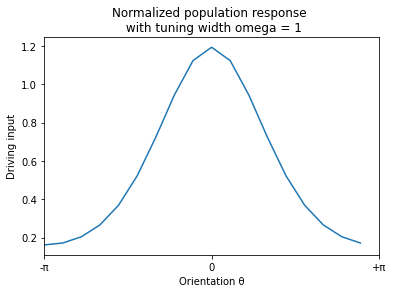

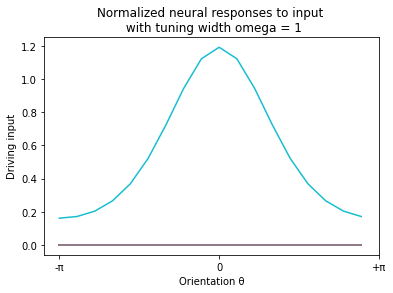

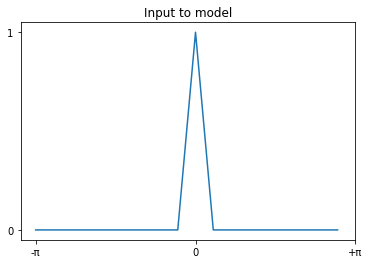

In [4]:

Test_layer = model.Sensory_Layer(number_of_neurons=len(input),omega = omega)

### This is the f_ij matrix
unnormalized_response_matrix = Test_layer.generate_output(input,plot=False,set_normalized_matrix=False,normalize=False)
population_response_unormalized = Test_layer.population_response(unnormalized_response_matrix)

### This is the r_ij matrix
normalized_response_matrix = Test_layer.generate_output(input,plot=False,set_normalized_matrix=True,normalize=True,gain_gamma=gain_gamma)
population_response_normalized = Test_layer.population_response(normalized_response_matrix)

plt.plot(population_response_normalized)
plt.title("Normalized population response \n with tuning width omega = "+str(omega))
plt.xlim(0,len(input))
plt.ylabel("Driving input")
plt.xlabel("Orientation θ")
plt.xticks([0,int(len(input)/2),len(input)],["-π",0,"+π"])
plt.show()
plt.plot(normalized_response_matrix)
plt.title("Normalized neural responses to input \n with tuning width omega = "+str(omega))
plt.ylabel("Driving input")
plt.xlabel("Orientation θ")
plt.xticks([0,int(len(input)/2),len(input)],["-π",0,"+π"])
plt.show()

plt.plot(input)
plt.title("Input to model")
plt.yticks([0,1])
plt.xticks([0,int(len(input)/2),len(input)],["-π",0,"+π"])
plt.show()



In [5]:
N = Test_layer.return_spiking_distribution(normalized_response_matrix,T=T,plot=False)

In [6]:
## This cell checks to see if the information from the input 
## was retained in the probability matrix N (equation 4)
## used mainly for debugging

##Test_layer.percent_similarity(input,N)


In [7]:
print("Maximum likelihood estimation: "+str(Test_layer.maximum_liklihood(N,unnormalized_response_matrix)))
print("Population response argmax: "+ str(np.argmax(population_response_unormalized)))
print("Cosine maximum liklihood estimation: "+str(Test_layer.maximum_liklihood_cos(N)))



Maximum likelihood estimation: 9
Population response argmax: 9
Cosine maximum liklihood estimation: 5


In [8]:
print("Maximum likelihood estimation theta: "+str((2*np.pi*Test_layer.maximum_liklihood(N,unnormalized_response_matrix))/len(N)-np.pi))
print("Population response argmax theta: "+ str(2*np.pi*np.argmax(population_response_unormalized)/len(N)-np.pi))
print("Cosine maximum liklihood estimation theta: "+str((2*np.pi*Test_layer.maximum_liklihood_cos(N))/len(N)-np.pi))

Maximum likelihood estimation theta: 0.0
Population response argmax theta: 0.0
Cosine maximum liklihood estimation theta: -1.3962634015954636
